Create a Jupyter Notebook.

Load the arrival time data into Pandas from data.csv.

Decide how to deal with any missing values in the data.

3(b) Visualize the data
Create some visualizations of the attendance data. Note that it can be grouped by day or aggregated together.

At least one of your visualizations must be a histogram.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("data.csv", header=None)
df.columns = ["Monday1", "Tuesday1", "Wednesday1", "Thursday1", "Friday1", "Monday2"]

In [4]:
df

,Monday1,Tuesday1,Wednesday1,Thursday1,Friday1,Monday2
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM
5,8:45 AM,8:45 AM,8:45 AM,8:40 AM,8:30 AM,8:40 AM
6,8:45 AM,8:54 AM,8:38 AM,8:40 AM,8:32 AM,8:41 AM
7,absent,11:00 AM,8:35 AM,8:15 AM,8:10 AM,8:10 AM
8,8:39 AM,8:13 AM,8:15 AM,8:12 AM,8:10 AM,8:00 AM
9,9:00 AM,8:50 AM,8:50 AM,8:50 AM,8:40 AM,8:45 AM


In [5]:
type(df["Monday1"][1])

str

For the first visualization, I'll make a scatter graph of the total attendees per day, giving us a sense of how it's trending.

In [7]:
# m1 = len(df["Monday1"])
# m1

In [8]:
# t1 = len(df["Tuesday1"]) 
# w1 = len(df["Wednesday1"])
# th1 = len(df["Thursday1"])
# f1 = len(df["Friday1"])
# m2 = len(df["Monday2"])

In [9]:
# attend_days = [m1, t1, w1, th1, f1, m2]
# attend_days

We want the total attendees per day, so maybe we can look at the entries containing "AM."

In [6]:
# df["Monday1"].str.count("AM")

In [7]:
#No. What if I sum it?
sum(df["Monday1"].str.count("AM"))


22

In [8]:
#That works. I'll reassign
m1 = sum(df["Monday1"].str.count("AM"))
t1 = sum(df["Tuesday1"].str.count("AM"))
w1 = sum(df["Wednesday1"].str.count("AM"))
th1 = sum(df["Thursday1"].str.count("AM"))
f1 = sum(df["Friday1"].str.count("AM"))
m2 = sum(df["Monday2"].str.count("AM"))

In [9]:
attend_days = [m1, t1, w1, th1, f1, m2]
attend_days

[22, 23, 23, 23, 23, 23]

Now I'll try to make the scatter plot.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
days = list(df.columns)
days

['Monday1', 'Tuesday1', 'Wednesday1', 'Thursday1', 'Friday1', 'Monday2']

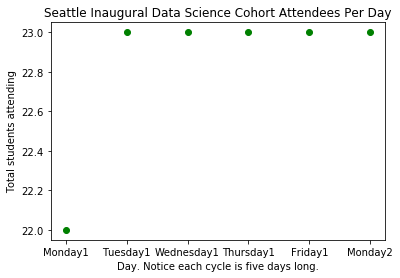

In [12]:
plt.plot(days, attend_days, "go")
plt.title("Seattle Inaugural Data Science Cohort Attendees Per Day")
plt.xlabel("Day. Notice each cycle is five days long.")
plt.ylabel("Total students attending")
plt.show()

As we see, this shows a strong initial growth with a steady value over the time window.

Now we'll make some histograms. Currently all the values are strings, while we want intervals. Moreover, one of the values from M1 does not represent a number, and it would be inappripriate  to coerce it as such. We could consider each day of the week as a series, changing the value in each case to something more quantied. If we turn it into into datetime, we have to deal with days and pretend we know the seconds. What are some other ways to think about arrival time? What about distance from midnight? What would that look like? How many minutes past midnight did everyone arrive at class?

In [17]:
n1 = df["Monday1"][1].split()[0]
n1

'8:40'

In [19]:
t = n1.split(":")
t

['8', '40']

In [27]:
t0 = float(t[0])
t1 = float(t[1])

In [28]:
t0

8.0

In [29]:
t1

40.0

In [30]:
t0m = t0*60
t0m

480.0

In [31]:
totmin = t0m + t1
totmin

520.0

In [37]:
def from_midnight(q: str)->float:
    s = q.split()[0]
    s1 = s.split(":")
    t1 = float(s1[0])*60
    t2 = float(s1[1])
    tot = t1 + t2
    return tot

In [38]:
from_midnight(df["Monday1"][1])

520.0

Now we have a function to turn each value into its distance from midnight. For a histogram, we could use bin 